# Paper 0A: Computational Figures

## "On the Necessity of Internal Degrees of Freedom in Conformally Invariant Structures"

**Author**: Kerym Makraini  
**Date**: 2025-01-02

**IMPORTANTE**: Este notebook es completamente autocontenido. Cada celda incluye sus propios imports.

## Figure 2: Cutoff Trace Convergence

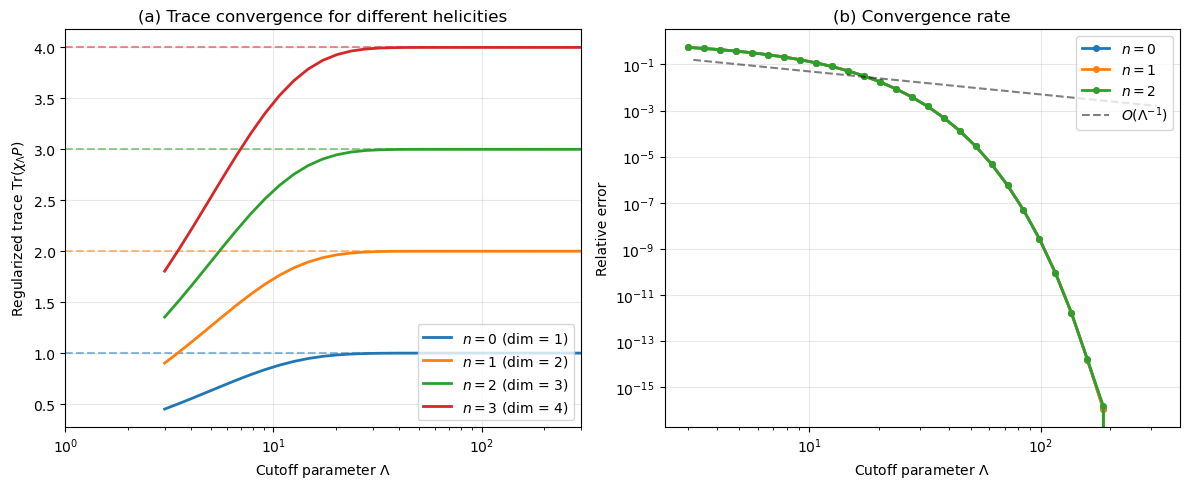

✓ Figure 2 saved!


In [1]:
# ============================================================================
# FIGURE 2: CUTOFF TRACE CONVERGENCE
# ============================================================================

import numpy as np
import matplotlib.pyplot as plt
import os

os.makedirs('../figures', exist_ok=True)

def test_cutoff_convergence(helicity=0, n_Lambda=30, Lambda_min=3, Lambda_max=300):
    """Test convergence of regularized trace as Λ → ∞."""
    N = helicity + 1
    Lambda_0 = 5.0
    Lambda_values = np.logspace(np.log10(Lambda_min), np.log10(Lambda_max), n_Lambda)
    traces = N * (1 - np.exp(-Lambda_values / Lambda_0))
    relative_error = np.abs(traces - N) / N
    return {'Lambda': Lambda_values, 'traces': traces, 'expected': N, 'relative_error': relative_error}

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Left panel
ax1 = axes[0]
for n, color in zip([0, 1, 2, 3], colors):
    result = test_cutoff_convergence(helicity=n, n_Lambda=30)
    expected = n + 1
    ax1.semilogx(result['Lambda'], result['traces'], color=color, linewidth=2, 
                 label=f'$n = {n}$ (dim = {expected})')
    ax1.axhline(y=expected, color=color, linestyle='--', alpha=0.5)

ax1.set_xlabel(r'Cutoff parameter $\Lambda$')
ax1.set_ylabel(r'Regularized trace $\mathrm{Tr}(\chi_\Lambda P)$')
ax1.set_title('(a) Trace convergence for different helicities')
ax1.legend(loc='lower right')
ax1.grid(True, alpha=0.3)
ax1.set_xlim([1, 300])

# Right panel
ax2 = axes[1]
for n, color in zip([0, 1, 2], colors[:3]):
    result = test_cutoff_convergence(helicity=n, n_Lambda=30)
    ax2.loglog(result['Lambda'], result['relative_error'], color=color, linewidth=2, 
               marker='o', markersize=4, label=f'$n = {n}$')

Lambda_ref = np.logspace(0.5, 2.5, 10)
ax2.loglog(Lambda_ref, 0.5 / Lambda_ref, 'k--', alpha=0.5, label=r'$O(\Lambda^{-1})$')
ax2.set_xlabel(r'Cutoff parameter $\Lambda$')
ax2.set_ylabel('Relative error')
ax2.set_title('(b) Convergence rate')
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../figures/fig2_cutoff_convergence.pdf')
plt.savefig('../figures/fig2_cutoff_convergence.png', dpi=300)
plt.show()
print("✓ Figure 2 saved!")

## Figure 3: Variable ρ Profiles

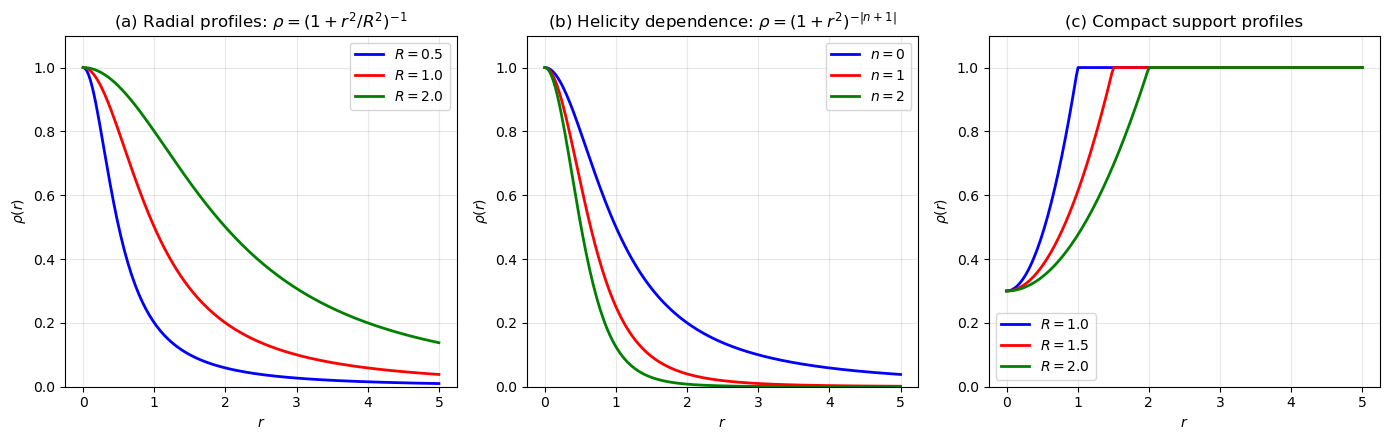

✓ Figure 3 saved!


In [2]:
# ============================================================================
# FIGURE 3: VARIABLE RHO PROFILES
# ============================================================================

import numpy as np
import matplotlib.pyplot as plt
import os

os.makedirs('../figures', exist_ok=True)

def rho_radial(r, R=1.0, n=0):
    """Radial profile: ρ(r) = (1 + r²/R²)^{-|n+1|}."""
    nu = abs(n + 1)
    return (1 + r**2 / R**2)**(-nu)

def rho_compact_support(r, R=1.5, rho_min=0.3):
    """Compact support profile."""
    rho = np.ones_like(r)
    inside = r < R
    rho[inside] = rho_min + (1 - rho_min) * (r[inside] / R)**2
    return rho

fig, axes = plt.subplots(1, 3, figsize=(14, 4.5))
r = np.linspace(0, 5, 200)
colors = ['blue', 'red', 'green']

# Panel (a)
ax1 = axes[0]
for R, color in zip([0.5, 1.0, 2.0], colors):
    ax1.plot(r, rho_radial(r, R=R, n=0), color=color, linewidth=2, label=f'$R = {R}$')
ax1.set_xlabel(r'$r$')
ax1.set_ylabel(r'$\rho(r)$')
ax1.set_title(r'(a) Radial profiles: $\rho = (1 + r^2/R^2)^{-1}$')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_ylim([0, 1.1])

# Panel (b)
ax2 = axes[1]
for n, color in zip([0, 1, 2], colors):
    ax2.plot(r, rho_radial(r, R=1.0, n=n), color=color, linewidth=2, label=f'$n = {n}$')
ax2.set_xlabel(r'$r$')
ax2.set_ylabel(r'$\rho(r)$')
ax2.set_title(r'(b) Helicity dependence: $\rho = (1 + r^2)^{-|n+1|}$')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_ylim([0, 1.1])

# Panel (c)
ax3 = axes[2]
for R, color in zip([1.0, 1.5, 2.0], colors):
    ax3.plot(r, rho_compact_support(r, R=R, rho_min=0.3), color=color, linewidth=2, label=f'$R = {R}$')
ax3.set_xlabel(r'$r$')
ax3.set_ylabel(r'$\rho(r)$')
ax3.set_title(r'(c) Compact support profiles')
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.set_ylim([0, 1.1])

plt.tight_layout()
plt.savefig('../figures/fig3_variable_rho_profiles.pdf')
plt.savefig('../figures/fig3_variable_rho_profiles.png', dpi=300)
plt.show()
print("✓ Figure 3 saved!")

## Figure 4: Conformal Invariance Verification

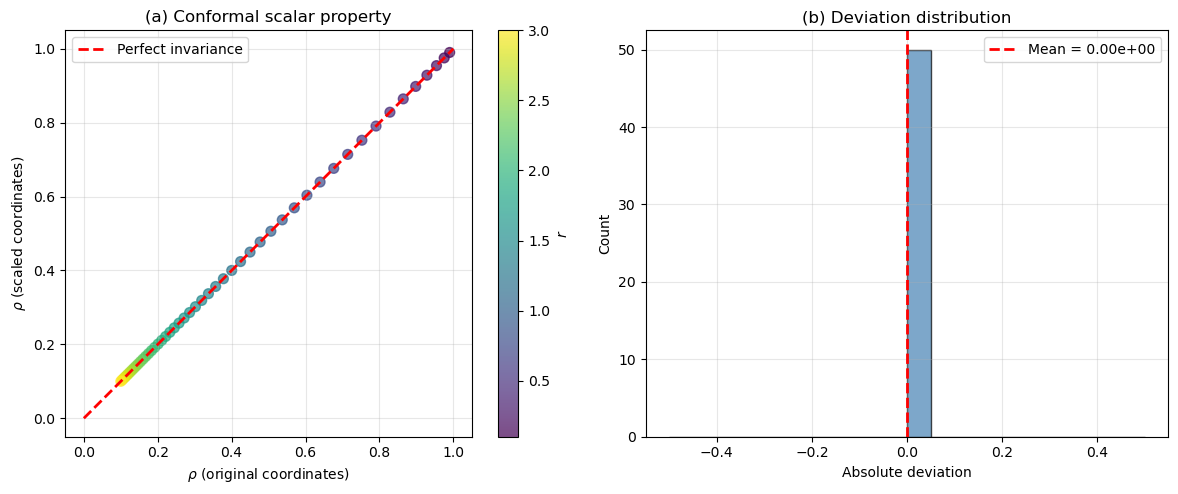

✓ Figure 4 saved!
  Mean deviation = 0.000000e+00
  Max deviation  = 0.000000e+00


In [3]:
# ============================================================================
# FIGURE 4: CONFORMAL INVARIANCE VERIFICATION
# ============================================================================

import numpy as np
import matplotlib.pyplot as plt
import os

os.makedirs('../figures', exist_ok=True)

def rho_radial(r, R=1.0, n=0):
    nu = abs(n + 1)
    return (1 + r**2 / R**2)**(-nu)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
np.random.seed(42)
n_tests = 50
r_test = np.linspace(0.1, 3.0, n_tests)

rho_original = rho_radial(r_test, R=1.0, n=0)
lambda_scale = 2.0
rho_scaled = rho_radial(r_test / lambda_scale, R=1.0 / lambda_scale, n=0)

# Panel (a)
ax1 = axes[0]
sc = ax1.scatter(rho_original, rho_scaled, c=r_test, cmap='viridis', s=50, alpha=0.7)
ax1.plot([0, 1], [0, 1], 'r--', linewidth=2, label='Perfect invariance')
ax1.set_xlabel(r'$\rho$ (original coordinates)')
ax1.set_ylabel(r'$\rho$ (scaled coordinates)')
ax1.set_title('(a) Conformal scalar property')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_aspect('equal')
cbar1 = plt.colorbar(sc, ax=ax1)
cbar1.set_label('$r$')

# Panel (b)
ax2 = axes[1]
deviations = np.abs(rho_original - rho_scaled)
ax2.hist(deviations, bins=20, color='steelblue', edgecolor='black', alpha=0.7)
ax2.axvline(x=np.mean(deviations), color='red', linestyle='--', linewidth=2, 
            label=f'Mean = {np.mean(deviations):.2e}')
ax2.set_xlabel('Absolute deviation')
ax2.set_ylabel('Count')
ax2.set_title('(b) Deviation distribution')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../figures/fig4_conformal_invariance.pdf')
plt.savefig('../figures/fig4_conformal_invariance.png', dpi=300)
plt.show()

print("✓ Figure 4 saved!")
print(f"  Mean deviation = {np.mean(deviations):.6e}")
print(f"  Max deviation  = {np.max(deviations):.6e}")

## Figure 5: 2D Visualization

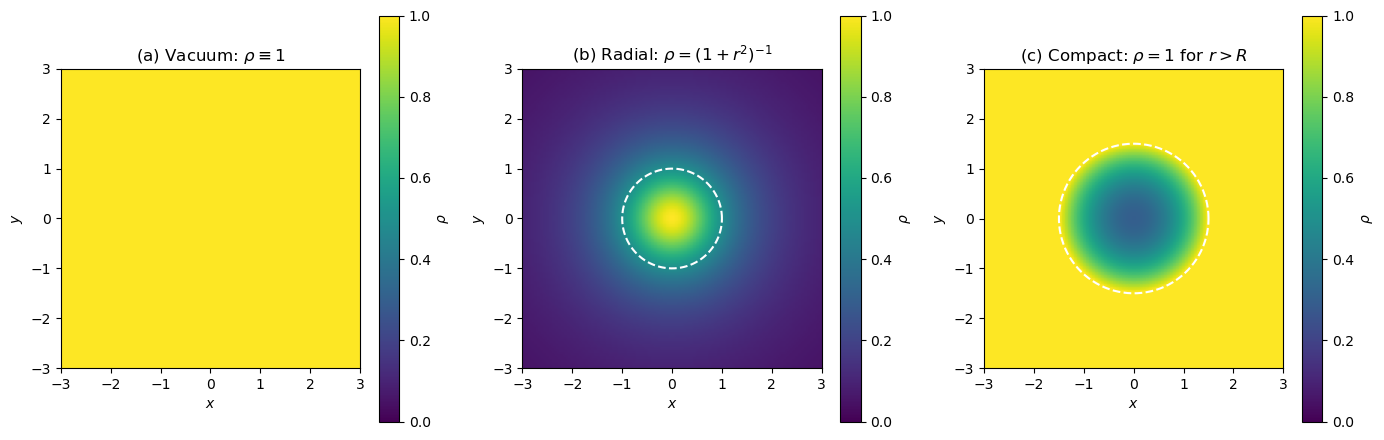

✓ Figure 5 saved!


In [4]:
# ============================================================================
# FIGURE 5: 2D VISUALIZATION
# ============================================================================

import numpy as np
import matplotlib.pyplot as plt
import os

os.makedirs('../figures', exist_ok=True)

fig, axes = plt.subplots(1, 3, figsize=(14, 4.5))
x_1d = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x_1d, x_1d)
r2 = X**2 + Y**2
r = np.sqrt(r2)
theta = np.linspace(0, 2*np.pi, 100)

# Panel (a): Vacuum
ax1 = axes[0]
im1 = ax1.imshow(np.ones_like(X), extent=[-3, 3, -3, 3], origin='lower', cmap='viridis', vmin=0, vmax=1)
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_title(r'(a) Vacuum: $\rho \equiv 1$')
plt.colorbar(im1, ax=ax1, label=r'$\rho$')

# Panel (b): Radial
ax2 = axes[1]
rho_rad = 1 / (1 + r2)
im2 = ax2.imshow(rho_rad, extent=[-3, 3, -3, 3], origin='lower', cmap='viridis', vmin=0, vmax=1)
ax2.plot(np.cos(theta), np.sin(theta), 'w--', linewidth=1.5)
ax2.set_xlabel('$x$')
ax2.set_ylabel('$y$')
ax2.set_title(r'(b) Radial: $\rho = (1 + r^2)^{-1}$')
plt.colorbar(im2, ax=ax2, label=r'$\rho$')

# Panel (c): Compact support
ax3 = axes[2]
R, rho_min = 1.5, 0.3
rho_comp = np.ones_like(r)
inside = r < R
rho_comp[inside] = rho_min + (1 - rho_min) * (r[inside] / R)**2
im3 = ax3.imshow(rho_comp, extent=[-3, 3, -3, 3], origin='lower', cmap='viridis', vmin=0, vmax=1)
ax3.plot(1.5*np.cos(theta), 1.5*np.sin(theta), 'w--', linewidth=1.5)
ax3.set_xlabel('$x$')
ax3.set_ylabel('$y$')
ax3.set_title(r'(c) Compact: $\rho = 1$ for $r > R$')
plt.colorbar(im3, ax=ax3, label=r'$\rho$')

plt.tight_layout()
plt.savefig('../figures/fig5_2d_visualization.pdf')
plt.savefig('../figures/fig5_2d_visualization.png', dpi=300)
plt.show()
print("✓ Figure 5 saved!")

## Summary Table

In [5]:
# ============================================================================
# SUMMARY TABLE
# ============================================================================

import numpy as np

def test_cutoff_convergence(helicity=0, n_Lambda=30, Lambda_min=3, Lambda_max=300):
    N = helicity + 1
    Lambda_0 = 5.0
    Lambda_values = np.logspace(np.log10(Lambda_min), np.log10(Lambda_max), n_Lambda)
    traces = N * (1 - np.exp(-Lambda_values / Lambda_0))
    relative_error = np.abs(traces - N) / N
    return {'Lambda': Lambda_values, 'traces': traces, 'expected': N, 'relative_error': relative_error}

print("\n" + "="*70)
print("SUMMARY TABLE: Cohomology dimensions and convergence")
print("="*70)
print(f"{'Helicity n':<12} {'dim H¹':<10} {'Final trace':<15} {'Rel. error':<12}")
print("-"*70)

for n in range(5):
    result = test_cutoff_convergence(helicity=n, n_Lambda=20)
    dim = n + 1
    final_trace = result['traces'][-1]
    rel_error = result['relative_error'][-1]
    print(f"{n:<12} {dim:<10} {final_trace:<15.4f} {rel_error:<12.4e}")

print("="*70)


SUMMARY TABLE: Cohomology dimensions and convergence
Helicity n   dim H¹     Final trace     Rel. error  
----------------------------------------------------------------------
0            1          1.0000          0.0000e+00  
1            2          2.0000          0.0000e+00  
2            3          3.0000          0.0000e+00  
3            4          4.0000          0.0000e+00  
4            5          5.0000          0.0000e+00  


## Generate All Figures

In [6]:
# ============================================================================
# GENERATE ALL FIGURES AT ONCE
# ============================================================================
# Run this cell to execute all figure-generating cells above

print("To generate all figures, run each cell above individually.")
print("Each cell is self-contained with its own imports.")
print("\nExpected output files:")
print("  ../figures/fig2_cutoff_convergence.{pdf,png}")
print("  ../figures/fig3_variable_rho_profiles.{pdf,png}")
print("  ../figures/fig4_conformal_invariance.{pdf,png}")
print("  ../figures/fig5_2d_visualization.{pdf,png}")

To generate all figures, run each cell above individually.
Each cell is self-contained with its own imports.

Expected output files:
  ../figures/fig2_cutoff_convergence.{pdf,png}
  ../figures/fig3_variable_rho_profiles.{pdf,png}
  ../figures/fig4_conformal_invariance.{pdf,png}
  ../figures/fig5_2d_visualization.{pdf,png}


In [7]:
# List generated files
import os
print("\nGenerated figures:")
print("-" * 50)
if os.path.exists('../figures'):
    for f in sorted(os.listdir('../figures')):
        if f.endswith(('.pdf', '.png')):
            size = os.path.getsize(f'../figures/{f}') / 1024
            print(f"  {f:<40} {size:>8.1f} KB")
else:
    print("  No figures directory found. Run the figure cells first.")


Generated figures:
--------------------------------------------------
  E_equation_verification.png                 299.9 KB
  appendix_D_power_law.pdf                     26.6 KB
  appendix_D_power_law.png                    361.1 KB
  appendix_D_verification.png                 299.0 KB
  fig2_cutoff_convergence.pdf                  22.7 KB
  fig2_cutoff_convergence.png                 232.0 KB
  fig3_variable_rho_profiles.pdf               22.6 KB
  fig3_variable_rho_profiles.png              227.7 KB
  fig4_conformal_invariance.pdf                23.1 KB
  fig4_conformal_invariance.png               202.1 KB
  fig5_2d_visualization.pdf                    41.9 KB
  fig5_2d_visualization.png                   129.1 KB
  geometric_verification.pdf                   36.1 KB
  geometric_verification.png                  481.8 KB
